## Подключение и конфигурация библиотеки

In [1]:
# Подключаем необходимые библиотеки
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 
from volta.providers.boxes.box500hz import VoltaBox500Hz
import queue

# конфигурируем python dict'ом
config = {
    'source': '/dev/cu.wchusbserial1420'
}

# создаём объект класса VoltaBox
volta_box = VoltaBox500Hz(config)


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.16) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Запуск сбора данных

In [2]:
# создаём очередь для результатов
q = queue.Queue()

# и запускаем сбор данных
volta_box.start_test(q)  
 
# теперь можно делать любые действия с вашим телефоном, энергопотребление которых необходимо записать

# Данные собираются прямо сейчас!

In [3]:
# прочитаем одну секунду sample'ов из очереди для примера
print(q.get_nowait())

      value     uts
0      0.00       0
1      0.00    2000
2     78.12    4000
3      0.00    6000
4    117.19    8000
5    126.95   10000
6      0.00   12000
7     83.01   14000
8     19.53   16000
9      0.00   18000
10    73.24   20000
11   112.30   22000
12     0.00   24000
13     0.00   26000
14     0.00   28000
15     0.00   30000
16   190.43   32000
17    39.06   34000
18     0.00   36000
19   419.92   38000
20    48.83   40000
21     0.00   42000
22   195.31   44000
23   371.09   46000
24     0.00   48000
25     0.00   50000
26     0.00   52000
27     0.00   54000
28     9.77   56000
29   151.37   58000
..      ...     ...
470  317.38  940000
471    0.00  942000
472  209.96  944000
473  219.73  946000
474    0.00  948000
475  175.78  950000
476    0.00  952000
477    0.00  954000
478  141.60  956000
479    0.00  958000
480   58.59  960000
481   78.12  962000
482    0.00  964000
483   78.12  966000
484   29.30  968000
485    0.00  970000
486   39.06  972000
487    0.00  974000


In [4]:
# сделаем функцию, которая забирает все накопленные данные из очереди и готовит их
def prepare_data():
    df = pd.DataFrame()
    for _ in range(q.qsize()):
        try:
            data = q.get_nowait()
            data['uts'] = data['uts'] // 1000
            data.set_index(keys='uts', inplace=True, drop=True)
            df = df.append(data)
        except queue.Empty:
            pass
    return df

In [5]:
# сделаем функцию, которая строит график
def draw_plot(df):
    # украшательства для графика
    fig = plt.figure(figsize=(10, 8), dpi=100, linewidth=1)
    plt.style.use('seaborn-dark')
    plt.xlabel('milliseconds')
    plt.ylabel('mA');
    plt.title('VoltaBox graph')

    # строим график тока
    plt.plot(df.index, df.values, color='darkblue', linestyle="-", linewidth=0.1)
    # считаем moving average
    rolling = df.rolling(500, win_type='hamming').mean()
    # строим график moving average
    plt.plot(rolling.index, rolling.values, color='red', label="moving average")
    
    plt.legend(loc='upper right')

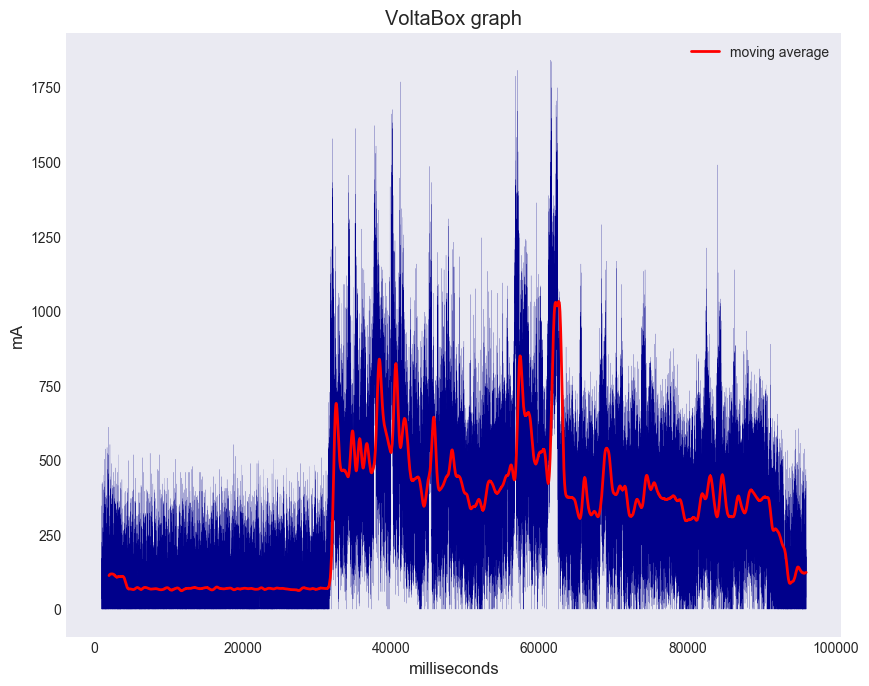

In [6]:
# готовим данные и строим график
df = prepare_data()
draw_plot(df)

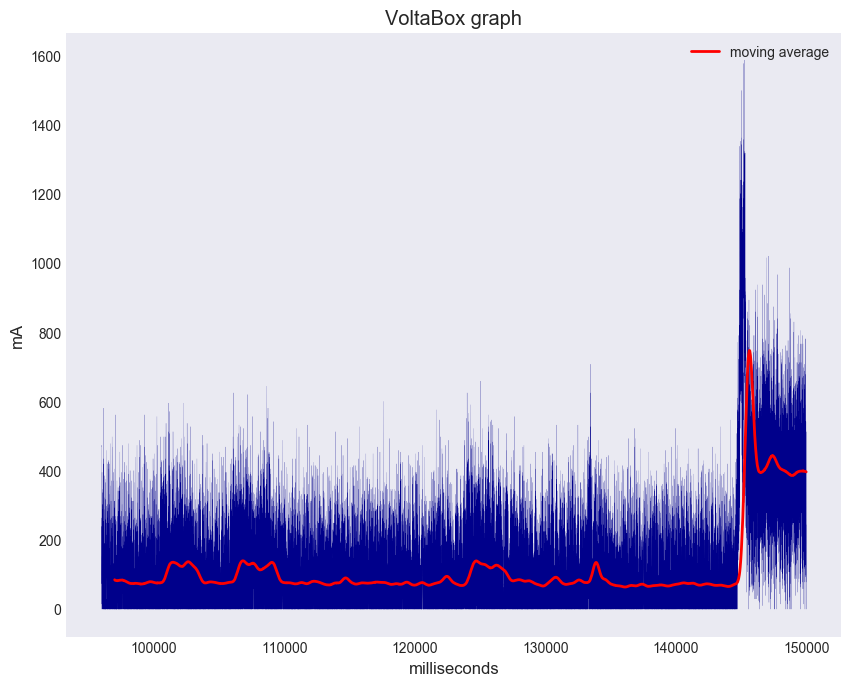

In [7]:
# готовим данные и строим график
df = prepare_data()
draw_plot(df)

In [8]:
# останавливаем сбор данных
volta_box.end_test()